Instala a biblioteca de controle

# SEL0611 - Fundamentos de Controle

Este é um exemplo do uso da biblioteca [Python Control System](https://github.com/python-control/python-control) para representar o modelo dinâmico de um sistema.

A documentação da biblioteca pode ser consultada nesse [link](https://python-control.readthedocs.io/en/0.9.0/).

## Carregar a biblioteca no Colab

Execute o comando a seguir para instalar a biblioteca no ambiente do Colab:

In [2]:
# !pip install slycot # biblioteca opcional
!pip install control

     |████████████████████████████████| 348kB 6.4MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=3db6ca7761192ceee142479ed4304b28687d6b4fec86fa74478aeb2f8bebb2fb
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


Carregue as bibiotecas:

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import control as ct
from control.matlab import *

## Modelo dinâmico de um sistema

### Função de Transferência

De forma geral, uma função de transferência pode ser expressa da seguinte forma:

$$ G(s) = \frac{b_{0} + b_{1}s^{-1}+...+b_{n-1} s^{-(n-1)} + b_n s^{-n}}{1 + a_1s^{-1} + ... + a_{n-1} s^{-(n-1)} + a_n s^{-n}}  =\frac{b_{0}s^n + b_{1}s^{n-1}+...+b_{n-1} s + b_n}{s^n + a_1s^{n-1} + ... + a_{n-1} s + a_n} $$
para sistemas realizáveis $b_0 =0 $, ou seja, a ordem do polinômio do numerador é menor que do denominador.

#### Exemplo:

Considere o sistema de suspensão veícular apresentado em aula, com a seguinte função de transferência:

$$  \frac{Y(s)}{R(s)} = \frac{\frac{k_w b}{m_1 m_2} (s + \frac{k_s}{b})}{s^4 + (\frac{b}{m_1}+ \frac{b}{m_2})s^3 + (\frac{k_s}{m_1}+ \frac{k_s}{m_2} + \frac{k_w}{m_1})s^2 + (\frac{k_w b}{m_1 m_2})s + \frac{k_w k_s}{m_1 m_2}}  $$



In [4]:
# Parâmetros do modelo da suspensão:
kw = 1e6
ks = 130000
b = 9800
m1 = 20
m2 = 375

a1 = b/m1 + b/m2
a2 = kw/m1 + ks/m2 + kw/m1
a3 = kw*b/(m1*m2)
a4 = kw*ks/(m1*m2)

b1=0
b2=0
b3 = kw*b/(m1*m2)
b4 = kw*b*ks/(m1*m2*b)

A função de transferência pode ser definida usando a biblioteca:

In [15]:
# Função de transferência:
num = np.array([b1, b2, b3, b4])
den = np.array([1, a1, a2, a3, a4])
Gtf = ct.tf(num, den)

print('G(s) = {}'.format(Gtf))

G(s) = 
                 1.307e+06 s + 1.733e+07
---------------------------------------------------------
s^4 + 516.1 s^3 + 1.003e+05 s^2 + 1.307e+06 s + 1.733e+07



Observe que primeiro dois vetores foram definidos contendo os coeficientes dos polinômios do numerador e do denominador. Em seguida, a função de transferência foi definida usando o comando `ct.ft` que recebe os dois vetores como argumento.


### Espaço de Estados

Um sistema modelado na forma de espaço de estados é representado por:

$$ \mathbf{\dot x} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} \\ \mathbf{y} = \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}$$

#### Exemplo:

O sistema de suspensão veícular apresentado em aula pode ser representado em espaço de estados por:

\begin{align} 
&\begin{bmatrix}  \dot x_1 \\ \dot x_2 \\ \dot x_3 \\ \dot x_4 \end{bmatrix} = \begin{bmatrix}  0 & 1 & 0 & 0 \\ -\frac{(k_s+k_w)}{m_1} & -\frac{b}{m_1} & \frac{k_s}{m_1} & \frac{b}{m_1} \\ 	0 & 0 & 0 & 1 \\ \frac{k_s}{m_2} & \frac{b}{m_2} & -\frac{k_s}{m_2} & -\frac{b}{m_2} \end{bmatrix} 	
\begin{bmatrix}  x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} + \begin{bmatrix}  0 \\ \frac{k_w}{m_1} \\ 0\\ 0  \end{bmatrix} u 	\\ 
&y= \begin{bmatrix}  0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix}  x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}  + 0  u 
\end{align}	

Considerando as escolhas de variáveis de estado apresentadas em aula 4, mas modificando a saída para que seja igual a posição do carro $x_3$.

A representação em espaço de estados da suspensão veícular pode ser definida utilizando a biblioteca:


In [26]:
# System matrices
A = [[0, 1., 0, 0], [-(ks+kw)/m1, -b/m1, ks/m1, b/m1], [0, 0, 0, 1.], [ks/m2, b/m2, -ks/m2, -b/m2]]
B = [[0], [kw/m1], [0], [0]]
C = [[0, 0, 1., 0]]
Gss = ss(A, B, C, 0)
print(Gss)

A = [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
     [-5.65000000e+04 -4.90000000e+02  6.50000000e+03  4.90000000e+02]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
     [ 3.46666667e+02  2.61333333e+01 -3.46666667e+02 -2.61333333e+01]]

B = [[    0.]
     [50000.]
     [    0.]
     [    0.]]

C = [[0. 0. 1. 0.]]

D = [[0.]]



Também é posível fazer a conversão de função de transferência para espaço de estados:

In [27]:
Hss = tf2ss(Gtf)
print(Hss)

A = [[-5.16133333e+02 -1.00346667e+05 -1.30666667e+06 -1.73333333e+07]
     [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]

B = [[1.]
     [0.]
     [0.]
     [0.]]

C = [[       0.                0.          1306666.66666667 17333333.33333333]]

D = [[0.]]



Perceba que as matrizes são diferentes pois a escolha dos estados pela biblioteca foi outra. A bibioteca utilizou uma representação do sistema em espaço de estados na **forma canônica de controle**.  

Mas se convertermos de volta de espaço de estado para função de transferência, obtemos o mesmo resultado:

In [31]:
Htf = ss2tf(Hss)
print(Htf) # Conversão da representação em espaço de estados Hss para função de transferência
print(ss2tf(Gss)) # Conversão da representação em espaço de estados Gss para função de transferência
print(Gtf) # Função de transferência original


-6.821e-13 s^3 - 2.183e-10 s^2 + 1.307e+06 s + 1.733e+07
---------------------------------------------------------
s^4 + 516.1 s^3 + 1.003e+05 s^2 + 1.307e+06 s + 1.733e+07


-4.547e-13 s^3 - 8.004e-11 s^2 + 1.307e+06 s + 1.733e+07
---------------------------------------------------------
s^4 + 516.1 s^3 + 5.685e+04 s^2 + 1.307e+06 s + 1.733e+07


                 1.307e+06 s + 1.733e+07
---------------------------------------------------------
s^4 + 516.1 s^3 + 1.003e+05 s^2 + 1.307e+06 s + 1.733e+07



### Resposta Transitória

A resposta do sistema a uma entrada do tipo degrau unitário pode ser obtida utilizando a biblioteca através da seguinte sequencia de comandos:

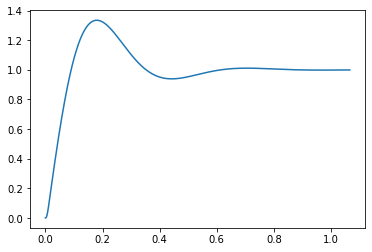

In [36]:
# Resposta do sistema a uma entrada degrau unitário:
plt.figure(1)
yout, T = step(Gtf) # Aqui foi utilizada a função de transferência Gtf
plt.plot(T.T, yout.T)
plt.show(block=False)

É possível utilizar qualquer representação do sistema:

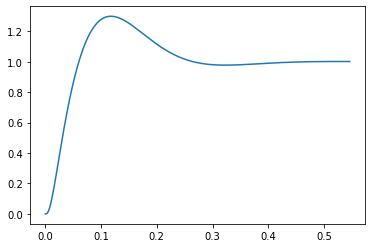

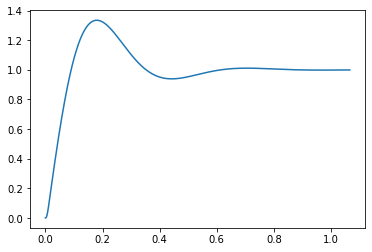

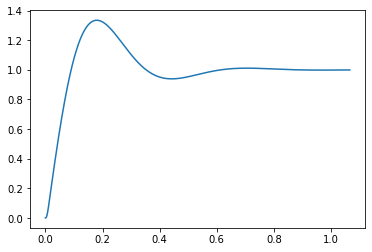

In [37]:
# Resposta do sistema a uma entrada degrau unitário:
plt.figure(1)
yout, T = step(Gss)
plt.plot(T.T, yout.T)
plt.show(block=False)

# Resposta do sistema a uma entrada degrau unitário:
plt.figure(1)
yout, T = step(Hss)
plt.plot(T.T, yout.T)
plt.show(block=False)

# Resposta do sistema a uma entrada degrau unitário:
plt.figure(1)
yout, T = step(Htf)
plt.plot(T.T, yout.T)
plt.show(block=False)


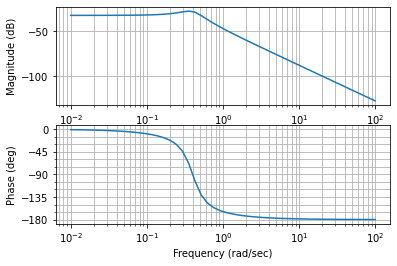

In [ ]:
# Bode plot for the system
plt.figure(2)
mag, phase, om = bode(sys, logspace(-2, 2), plot=True)
plt.show(block=False)



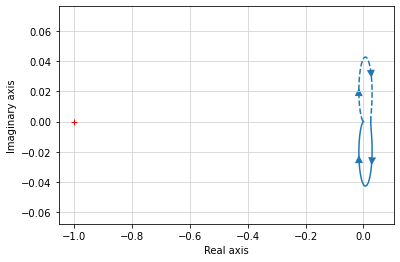

In [ ]:
# Nyquist plot for the system
plt.figure(3)
nyquist(sys)
plt.show(block=False)



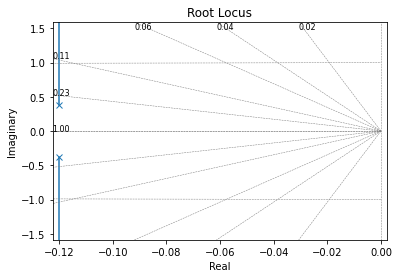

In [ ]:
# Root lcous plot for the system
rlocus(sys)

if 'PYCONTROL_TEST_EXAMPLES' not in os.environ:
    plt.show()